In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading the Dataset**

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

help(keras.utils)

NameError: ignored

In [16]:
df = pd.read_csv('/content/drive/MyDrive/YT_Videos_Comments.csv')
df

<ipython-input-16-0dc37f157f3b>:1: DtypeWarning: Columns (2,3,4,5,6,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/drive/MyDrive/YT_Videos_Comments.csv')


,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...,...,...,...,...,...
861957,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
861958,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
861959,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
861960,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


# **Pre-processing**

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861962 entries, 0 to 861961
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   User                       861962 non-null  object
 1   Video Title                861813 non-null  object
 2   Video Description          665195 non-null  object
 3   Video ID                   432632 non-null  object
 4   Comment (Displayed)        394587 non-null  object
 5   Comment (Actual)           379081 non-null  object
 6   Comment Author             379053 non-null  object
 7   Comment Author Channel ID  379094 non-null  object
 8   Comment Time               379100 non-null  object
dtypes: object(9)
memory usage: 59.2+ MB


In [18]:
df = df.dropna()
df

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z
...,...,...,...,...,...,...,...,...,...
861957,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z
861958,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z
861959,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z
861960,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 379032 entries, 0 to 861961
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   User                       379032 non-null  object
 1   Video Title                379032 non-null  object
 2   Video Description          379032 non-null  object
 3   Video ID                   379032 non-null  object
 4   Comment (Displayed)        379032 non-null  object
 5   Comment (Actual)           379032 non-null  object
 6   Comment Author             379032 non-null  object
 7   Comment Author Channel ID  379032 non-null  object
 8   Comment Time               379032 non-null  object
dtypes: object(9)
memory usage: 28.9+ MB


In [20]:
df['User'].unique()

array(['Cleo Abram', 'Jet Lag: The Game', 'neo', 'Physics Girl'],
      dtype=object)

In [21]:
def fun(data):
    # pseudo function for a test
    print(data)

for k, d in df.groupby('User'):
    fun(d)

             User                           Video Title  \
0      Cleo Abram  Robots made of spiders (yes, really)   
1      Cleo Abram  Robots made of spiders (yes, really)   
2      Cleo Abram  Robots made of spiders (yes, really)   
3      Cleo Abram  Robots made of spiders (yes, really)   
4      Cleo Abram  Robots made of spiders (yes, really)   
...           ...                                   ...   
28814  Cleo Abram                        Why I left Vox   
28815  Cleo Abram                        Why I left Vox   
28816  Cleo Abram                        Why I left Vox   
28817  Cleo Abram                        Why I left Vox   
28818  Cleo Abram                        Why I left Vox   

                                       Video Description     Video ID  \
0      I'M SORRY OK. But this is fascinating. \n\nSci...  YXd4z3gWyVE   
1      I'M SORRY OK. But this is fascinating. \n\nSci...  YXd4z3gWyVE   
2      I'M SORRY OK. But this is fascinating. \n\nSci...  YXd4z3gWyVE   

In [22]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text) # Remove URLs
    text = re.sub('[^a-zA-Z0-9\s]', '', text) # Remove special characters
    text = re.sub('\s+', ' ', text) # Remove extra whitespace
    text = text.lower() # Convert text to lowercase
    return text

df['clean_comment_text'] = df['Comment (Displayed)'].apply(clean_text)


<ipython-input-22-320850ae0dcd>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_comment_text'] = df['Comment (Displayed)'].apply(clean_text)


In [23]:
import nltk

In [24]:
nltk.download('punkt')

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    return tokens

df['tokens'] = df['clean_comment_text'].apply(tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-24-f4759a402734>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tokens'] = df['clean_comment_text'].apply(tokenize)


In [25]:
nltk.download('stopwords')

stopwords = set(nltk.corpus.stopwords.words('english'))

def remove_stopwords(tokens):
    filtered_tokens = [token for token in tokens if token not in stopwords]
    return filtered_tokens

df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
<ipython-input-25-fcdb0506c290>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['filtered_tokens'] = df['tokens'].apply(remove_stopwords)


In [26]:
df.head()

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time,clean_comment_text,tokens,filtered_tokens
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z,zombie spider bomb the damn lab before it39s late,"[zombie, spider, bomb, the, damn, lab, before,...","[zombie, spider, bomb, damn, lab, it39s, late]"
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z,this is way less cool than it seems spiders ac...,"[this, is, way, less, cool, than, it, seems, s...","[way, less, cool, seems, spiders, actually, mu..."
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z,spiders see this and this is why they made the...,"[spiders, see, this, and, this, is, why, they,...","[spiders, see, made, terrifying, go, poking, p..."
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z,you looks pretty,"[you, looks, pretty]","[looks, pretty]"
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z,i can hear the hairs standing up on my wifes a...,"[i, can, hear, the, hairs, standing, up, on, m...","[hear, hairs, standing, wifes, arms, mile, away]"


# **Sampling the data**

In [42]:
df1 = df[df['User']=='Cleo Abram']
df1

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time,clean_comment_text,tokens,filtered_tokens
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,Bagus Hutomo,UC-F6GFyxAqGhN3_MEJLksxg,2023-03-11T07:39:33Z,zombie spider bomb the damn lab before it39s late,"[zombie, spider, bomb, the, damn, lab, before,...","[zombie, spider, bomb, damn, lab, it39s, late]"
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",CMZ neu,UCZKnVEtNze-fFxCvsRnaIuA,2023-03-11T05:26:10Z,this is way less cool than it seems spiders ac...,"[this, is, way, less, cool, than, it, seems, s...","[way, less, cool, seems, spiders, actually, mu..."
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,Kiana Marrie,UCutp6oeKAxsO6fXp1vyzvIQ,2023-03-11T04:02:27Z,spiders see this and this is why they made the...,"[spiders, see, this, and, this, is, why, they,...","[spiders, see, made, terrifying, go, poking, p..."
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,you looks pretty 😍,you looks pretty 😍,Noob,UC9J99riIPd6ja-XDFSwrY-Q,2023-03-11T02:50:50Z,you looks pretty,"[you, looks, pretty]","[looks, pretty]"
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,YXd4z3gWyVE,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,chancellor9000,UC8WEPXkCSh87h6kBcFT-o1g,2023-03-11T02:46:02Z,i can hear the hairs standing up on my wifes a...,"[i, can, hear, the, hairs, standing, up, on, m...","[hear, hairs, standing, wifes, arms, mile, away]"
...,...,...,...,...,...,...,...,...,...,...,...,...
28814,Cleo Abram,Why I left Vox,"Thank you, Vox, for the best job I ever had. H...",54IteWmegk0,The Internet Cables made her Leave Vox!!,The Internet Cables made her Leave Vox!!,Caleb Brown,UC0xLpTjQvbYYSMGkU3vYYaQ,2022-01-10T14:11:11Z,the internet cables made her leave vox,"[the, internet, cables, made, her, leave, vox]","[internet, cables, made, leave, vox]"
28815,Cleo Abram,Why I left Vox,"Thank you, Vox, for the best job I ever had. H...",54IteWmegk0,I always Love your content!! Keep up the Great...,I always Love your content!! Keep up the Great...,Caleb Brown,UC0xLpTjQvbYYSMGkU3vYYaQ,2022-01-10T14:10:48Z,i always love your content keep up the great w...,"[i, always, love, your, content, keep, up, the...","[always, love, content, keep, great, work, can..."
28816,Cleo Abram,Why I left Vox,"Thank you, Vox, for the best job I ever had. H...",54IteWmegk0,I&#39;m so so looking forward to this!,I'm so so looking forward to this!,Radon,UC6u9r0Ike8FMw9egKFDvdSQ,2022-01-10T14:09:31Z,i39m so so looking forward to this,"[i39m, so, so, looking, forward, to, this]","[i39m, looking, forward]"
28817,Cleo Abram,Why I left Vox,"Thank you, Vox, for the best job I ever had. H...",54IteWmegk0,Let&#39;s go,Let's go,suraj kumar,UCAWn2u5oAkanPFF8tkKjlZA,2022-01-10T14:07:24Z,let39s go,"[let39s, go]","[let39s, go]"


In [43]:
df2 = df[df['User']=='Jet Lag: The Game']
df2

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time,clean_comment_text,tokens,filtered_tokens
28819,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,LxLgmsmvXOE,"Love the nail toby <a href=""https://www.youtub...",Love the nail toby 12:37,Muhamad Azrin Zakaria,UCIp7_JNaAjjTsrvgtizZrRg,2023-03-11T12:08:53Z,love the nail toby a href,"[love, the, nail, toby, a, href]","[love, nail, toby, href]"
28820,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,LxLgmsmvXOE,"<a href=""http://www.youtube.com/results?search...",#suckstobethem,David Wimmer,UC9yCA4j5X4xqiXGjmnohNVg,2023-03-11T11:44:42Z,a href,"[a, href]",[href]
28821,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,LxLgmsmvXOE,I like the addition of Toby very much! She is ...,I like the addition of Toby very much! She is ...,dswenneker,UCsbNZDMHl5vZE_FcW7ig8og,2023-03-11T11:15:13Z,i like the addition of toby very much she is s...,"[i, like, the, addition, of, toby, very, much,...","[like, addition, toby, much, smart, character,..."
28822,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,LxLgmsmvXOE,Vogel&#39;s is an NZ brand and they make aweso...,Vogel's is an NZ brand and they make awesome g...,Jack,UCRZOVTTm2XV33Fpmy_gT7ag,2023-03-11T11:12:56Z,vogel39s is an nz brand and they make awesome ...,"[vogel39s, is, an, nz, brand, and, they, make,...","[vogel39s, nz, brand, make, awesome, granola]"
28823,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,LxLgmsmvXOE,SO thrilled to see a new season,SO thrilled to see a new season,l,UCRk-WZ_mZDBArzoMYL7pPlA,2023-03-11T10:57:08Z,so thrilled to see a new season,"[so, thrilled, to, see, a, new, season]","[thrilled, see, new, season]"
...,...,...,...,...,...,...,...,...,...,...,...,...
52022,Jet Lag: The Game,We Played Connect 4 by Travelling to Actual US...,Get $20 off an annual Nebula subscription by s...,oZSUxdzgA08,sup,sup,waffpng,UCDTnMlRyDvbrqLQvNqmUSJg,2022-05-25T18:00:23Z,sup,[sup],[sup]
52023,Jet Lag: The Game,We Played Connect 4 by Travelling to Actual US...,Get $20 off an annual Nebula subscription by s...,oZSUxdzgA08,First,First,AS,UCHuM6gZnxaeFjApaBfK8TRQ,2022-05-25T18:00:22Z,first,[first],[first]
52024,Jet Lag: The Game,We Played Connect 4 by Travelling to Actual US...,Get $20 off an annual Nebula subscription by s...,oZSUxdzgA08,Yo,Yo,_underscore_,UCROmqxI5DHoes9Tp9yKfa0g,2022-05-25T18:00:15Z,yo,[yo],[yo]
52025,Jet Lag: The Game,We Played Connect 4 by Travelling to Actual US...,Get $20 off an annual Nebula subscription by s...,oZSUxdzgA08,6,6,Nintentoad125,UCBQqMm1Xxjnc6I2oi-Ms9Ew,2022-05-25T18:00:08Z,6,[6],[6]


In [44]:
df3 = df[df['User']=='neo']
df3

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time,clean_comment_text,tokens,filtered_tokens
52027,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,2dAp1PmhH8g,Las Vegas is the greatest creation of mafia fa...,Las Vegas is the greatest creation of mafia fa...,Shivam Tomar,UCkb6rOfXRH6FsMqCM9hYQ3w,2023-03-11T12:05:05Z,las vegas is the greatest creation of mafia fa...,"[las, vegas, is, the, greatest, creation, of, ...","[las, vegas, greatest, creation, mafia, families]"
52028,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,2dAp1PmhH8g,New to your channel! Lots of research and good...,New to your channel! Lots of research and good...,Juan Vera,UC7IGVv_aqYf-0o6qfrnb7Tw,2023-03-11T11:21:28Z,new to your channel lots of research and good ...,"[new, to, your, channel, lots, of, research, a...","[new, channel, lots, research, good, animation..."
52029,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,2dAp1PmhH8g,"=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE<...","=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE\...",Master Robotnik,UCL8yrt06hhvkrun1uy907JA,2023-03-11T10:35:17Z,from ashes to the topnice comebackhehehehebrbr...,"[from, ashes, to, the, topnice, comebackhehehe...","[ashes, topnice, comebackhehehehebrbrnowi, gue..."
52030,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,2dAp1PmhH8g,Bailey&#39;s? Bally&#39;s is pronounced like B...,Bailey's? Bally's is pronounced like Bali's.,유튜브전도사,UCh-42TlWM85H6-3UFWDu4eA,2023-03-11T10:29:59Z,bailey39s bally39s is pronounced like bali39s,"[bailey39s, bally39s, is, pronounced, like, ba...","[bailey39s, bally39s, pronounced, like, bali39s]"
52031,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,2dAp1PmhH8g,Suvvern,Suvvern,Sam Fisher,UCCAWx8h4T4r8Z4nRqbeXpKw,2023-03-11T10:29:40Z,suvvern,[suvvern],[suvvern]
...,...,...,...,...,...,...,...,...,...,...,...,...
111256,neo,Is This a Chinese City in Malaysia?,"Check out Nebula, where you can watch exclusiv...",VDkKqHG1BFE,What sultan doing..hmmmm,What sultan doing..hmmmm,Human Being,UC5PT34MG2-xbO_2NcVMju0g,2020-08-02T15:05:38Z,what sultan doinghmmmm,"[what, sultan, doinghmmmm]","[sultan, doinghmmmm]"
111257,neo,Is This a Chinese City in Malaysia?,"Check out Nebula, where you can watch exclusiv...",VDkKqHG1BFE,"Its all about money,not religion, culture,dign...","Its all about money,not religion, culture,dign...",Human Being,UC5PT34MG2-xbO_2NcVMju0g,2020-08-02T15:04:22Z,its all about moneynot religion culturedignity...,"[its, all, about, moneynot, religion, cultured...","[moneynot, religion, culturedignity, anythingj..."
111258,neo,Is This a Chinese City in Malaysia?,"Check out Nebula, where you can watch exclusiv...",VDkKqHG1BFE,China twon,China twon,喬峰,UCJDGF55cRq3xD--QrJQHQFA,2020-08-02T13:11:58Z,china twon,"[china, twon]","[china, twon]"
111259,neo,Is This a Chinese City in Malaysia?,"Check out Nebula, where you can watch exclusiv...",VDkKqHG1BFE,"MALAYSIA IS MALAY LAND, NOT CHINESE. NOT TO BE...","MALAYSIA IS MALAY LAND, NOT CHINESE. NOT TO BE...",rawakk.,UCC2ymzYkFBE54L3KlmRJq8g,2020-08-02T12:03:13Z,malaysia is malay land not chinese not to bein...,"[malaysia, is, malay, land, not, chinese, not,...","[malaysia, malay, land, chinese, racist, true,..."


In [45]:
df4 = df[df['User']=='Physics Girl']
df4

,User,Video Title,Video Description,Video ID,Comment (Displayed),Comment (Actual),Comment Author,Comment Author Channel ID,Comment Time,clean_comment_text,tokens,filtered_tokens
111261,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,RIP did they plan her funeral yet..,RIP did they plan her funeral yet..,kill trocity,UCFMfUA6T7YhTIJNJk_r9fHg,2023-03-11T12:16:15Z,rip did they plan her funeral yet,"[rip, did, they, plan, her, funeral, yet]","[rip, plan, funeral, yet]"
111262,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,I hope you recover fast I pray to universe,I hope you recover fast I pray to universe,Fact short,UCsk_OCi1iFkKQD--_r01zfg,2023-03-11T12:16:00Z,i hope you recover fast i pray to universe,"[i, hope, you, recover, fast, i, pray, to, uni...","[hope, recover, fast, pray, universe]"
111263,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,"This broke my heart, you are an amazing friend...","This broke my heart, you are an amazing friend...",Henry Fourie,UCfWTkpjxuQLzNrBdf0zPXFQ,2023-03-11T12:10:28Z,this broke my heart you are an amazing friend ...,"[this, broke, my, heart, you, are, an, amazing...","[broke, heart, amazing, friend, big, props, hu..."
111264,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,💜💜💜,💜💜💜,Stevie Valour,UCRkQovR795UeANmvLaWrvIg,2023-03-11T12:09:42Z,,[],[]
111265,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,vydgkCCXbTA,This is such a scam,This is such a scam,satish8299,UCm2Ip-xLLnAZFKEZYb2jM3Q,2023-03-11T12:01:28Z,this is such a scam,"[this, is, such, a, scam]",[scam]
...,...,...,...,...,...,...,...,...,...,...,...,...
861957,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,"hey girl,make more vdos and make it lengthy .....","hey girl,make more vdos and make it lengthy .....",Omkar Bhambure,UCgY0dubqhFHVD6wWq37UCtg,2016-01-12T21:32:52Z,hey girlmake more vdos and make it lengthy rea...,"[hey, girlmake, more, vdos, and, make, it, len...","[hey, girlmake, vdos, make, lengthy, really, h..."
861958,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Third,Third,Izzo Mapping,UCF0vKXNgNwO2iutasiiLoNQ,2016-01-12T21:30:37Z,third,[third],[third]
861959,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,third,third,Indecisive,UChNeyv6tBcgrjfXJiy3xRFg,2016-01-12T21:30:34Z,third,[third],[third]
861960,Physics Girl,5 AMAZING stars we’ve discovered in space!,This episode is brought to you by Squarespace:...,xyXpQxz7BOs,Second,Second,Nathan,UCkMeQzamGWna00H_sMQddvQ,2016-01-12T21:30:02Z,second,[second],[second]


In [46]:
df1 = df1.iloc[:5000,:] #since the original dataset is too big, we couldn't train the models on the complete dataset
df1.drop(["Video ID","Comment Author","Comment Author Channel ID","Comment Time","tokens"],axis=1,inplace = True)
df1

<ipython-input-46-fa3d39264156>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop(["Video ID","Comment Author","Comment Author Channel ID","Comment Time","tokens"],axis=1,inplace = True)


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,zombie spider bomb the damn lab before it39s late,"[zombie, spider, bomb, damn, lab, it39s, late]"
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",this is way less cool than it seems spiders ac...,"[way, less, cool, seems, spiders, actually, mu..."
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,spiders see this and this is why they made the...,"[spiders, see, made, terrifying, go, poking, p..."
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,you looks pretty 😍,you looks pretty 😍,you looks pretty,"[looks, pretty]"
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,i can hear the hairs standing up on my wifes a...,"[hear, hairs, standing, wifes, arms, mile, away]"
...,...,...,...,...,...,...,...
4996,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,"Eggsistential. <a href=""https://www.youtube.co...",Eggsistential. 1:17,eggsistential a href a hrefaboutinvalidzcsafeza,"[eggsistential, href, hrefaboutinvalidzcsafeza]"
4997,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,I&#39;d love to know more about the tech in th...,"I'd love to know more about the tech in the ""r...",i39d love to know more about the tech in the q...,"[i39d, love, know, tech, quotrear, brakesquot,..."
4998,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,"When formula e was born, there was this huge m...","When formula e was born, there was this huge m...",when formula e was born there was this huge ma...,"[formula, e, born, huge, marketing, campaign, ..."
4999,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,Excellent as always. So nice to feel time was ...,Excellent as always. So nice to feel time was ...,excellent as always so nice to feel time was w...,"[excellent, always, nice, feel, time, well, sp..."


In [47]:
df2 = df2.iloc[:5000,:]
df2.drop(["Video ID","Comment Author","Comment Author Channel ID","Comment Time","tokens"],axis=1,inplace = True)
df2

<ipython-input-47-3d893b52203f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(["Video ID","Comment Author","Comment Author Channel ID","Comment Time","tokens"],axis=1,inplace = True)


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens
28819,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,"Love the nail toby <a href=""https://www.youtub...",Love the nail toby 12:37,love the nail toby a href,"[love, nail, toby, href]"
28820,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,"<a href=""http://www.youtube.com/results?search...",#suckstobethem,a href,[href]
28821,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,I like the addition of Toby very much! She is ...,I like the addition of Toby very much! She is ...,i like the addition of toby very much she is s...,"[like, addition, toby, much, smart, character,..."
28822,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,Vogel&#39;s is an NZ brand and they make aweso...,Vogel's is an NZ brand and they make awesome g...,vogel39s is an nz brand and they make awesome ...,"[vogel39s, nz, brand, make, awesome, granola]"
28823,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,SO thrilled to see a new season,SO thrilled to see a new season,so thrilled to see a new season,"[thrilled, see, new, season]"
...,...,...,...,...,...,...,...
33828,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,You guys gotta make a series where more dishon...,You guys gotta make a series where more dishon...,you guys gotta make a series where more dishon...,"[guys, got, ta, make, series, dishonesty, chea..."
33829,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,The bird photograph segment is incredible.,The bird photograph segment is incredible.,the bird photograph segment is incredible,"[bird, photograph, segment, incredible]"
33830,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,I feel like forcing someone to binge drink as ...,I feel like forcing someone to binge drink as ...,i feel like forcing someone to binge drink as ...,"[feel, like, forcing, someone, binge, drink, f..."
33831,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,Ben&#39;s dedication is commendable,Ben's dedication is commendable,ben39s dedication is commendable,"[ben39s, dedication, commendable]"


In [48]:
df3 = df3.iloc[:5000,:]
df3.drop(["Video ID","Comment Author","Comment Author Channel ID","Comment Time","tokens"],axis=1,inplace = True)
df3

<ipython-input-48-2a816a523c0e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.drop(["Video ID","Comment Author","Comment Author Channel ID","Comment Time","tokens"],axis=1,inplace = True)


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens
52027,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Las Vegas is the greatest creation of mafia fa...,Las Vegas is the greatest creation of mafia fa...,las vegas is the greatest creation of mafia fa...,"[las, vegas, greatest, creation, mafia, families]"
52028,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,New to your channel! Lots of research and good...,New to your channel! Lots of research and good...,new to your channel lots of research and good ...,"[new, channel, lots, research, good, animation..."
52029,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,"=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE<...","=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE\...",from ashes to the topnice comebackhehehehebrbr...,"[ashes, topnice, comebackhehehehebrbrnowi, gue..."
52030,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Bailey&#39;s? Bally&#39;s is pronounced like B...,Bailey's? Bally's is pronounced like Bali's.,bailey39s bally39s is pronounced like bali39s,"[bailey39s, bally39s, pronounced, like, bali39s]"
52031,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Suvvern,Suvvern,suvvern,[suvvern]
...,...,...,...,...,...,...,...
57024,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,As a Cupertino resident (since 2016) it always...,As a Cupertino resident (since 2016) it always...,as a cupertino resident since 2016 it always g...,"[cupertino, resident, since, 2016, always, giv..."
57025,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,It&#39;s funny sadly how this nice area &amp; ...,It's funny sadly how this nice area & building...,it39s funny sadly how this nice area amp build...,"[it39s, funny, sadly, nice, area, amp, buildin..."
57026,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,what music is at around 8 minutes into the video?,what music is at around 8 minutes into the video?,what music is at around 8 minutes into the video,"[music, around, 8, minutes, video]"
57027,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,Mrs Christina the bitcoin trader is legit and...,Mrs Christina the bitcoin trader is legit and...,mrs christina the bitcoin trader is legit and ...,"[mrs, christina, bitcoin, trader, legit, metho..."


In [49]:
df4 = df4.iloc[:5000,:]
df4.drop(["Video ID","Comment Author","Comment Author Channel ID","Comment Time","tokens"],axis=1,inplace = True)
df4

<ipython-input-49-e8a650a3023d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop(["Video ID","Comment Author","Comment Author Channel ID","Comment Time","tokens"],axis=1,inplace = True)


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens
111261,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,RIP did they plan her funeral yet..,RIP did they plan her funeral yet..,rip did they plan her funeral yet,"[rip, plan, funeral, yet]"
111262,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,I hope you recover fast I pray to universe,I hope you recover fast I pray to universe,i hope you recover fast i pray to universe,"[hope, recover, fast, pray, universe]"
111263,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,"This broke my heart, you are an amazing friend...","This broke my heart, you are an amazing friend...",this broke my heart you are an amazing friend ...,"[broke, heart, amazing, friend, big, props, hu..."
111264,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,💜💜💜,💜💜💜,,[]
111265,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,This is such a scam,This is such a scam,this is such a scam,[scam]
...,...,...,...,...,...,...,...
116261,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,Did she get the bivalent juice last year? anyo...,Did she get the bivalent juice last year? anyo...,did she get the bivalent juice last year anyon...,"[get, bivalent, juice, last, year, anyone, alm..."
116262,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,her joy with science is contagious and the ene...,her joy with science is contagious and the ene...,her joy with science is contagious and the ene...,"[joy, science, contagious, energy, brings, vid..."
116263,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,Done! Thanks for being a good friend.,Done! Thanks for being a good friend.,done thanks for being a good friend,"[done, thanks, good, friend]"
116264,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,I only recently got introduced to Physics Girl...,I only recently got introduced to Physics Girl...,i only recently got introduced to physics girl...,"[recently, got, introduced, physics, girl, hoo..."


# **Feature Extraction using TF-IDF and PCA**

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
vectorizer = TfidfVectorizer(max_features=100, max_df=0.95, min_df=2, stop_words='english')

In [150]:
X1 = vectorizer.fit_transform(df1['clean_comment_text'])
df1["vector"]=X1.toarray().tolist()
df1

<ipython-input-150-518c0f18b176>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["vector"]=X1.toarray().tolist()


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens,cluster,vector
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,zombie spider bomb the damn lab before it39s late,"[zombie, spider, bomb, damn, lab, it39s, late]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",this is way less cool than it seems spiders ac...,"[way, less, cool, seems, spiders, actually, mu...",1,"[0.4263499361997202, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,spiders see this and this is why they made the...,"[spiders, see, made, terrifying, go, poking, p...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,you looks pretty 😍,you looks pretty 😍,you looks pretty,"[looks, pretty]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,i can hear the hairs standing up on my wifes a...,"[hear, hairs, standing, wifes, arms, mile, away]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
4996,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,"Eggsistential. <a href=""https://www.youtube.co...",Eggsistential. 1:17,eggsistential a href a hrefaboutinvalidzcsafeza,"[eggsistential, href, hrefaboutinvalidzcsafeza]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4997,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,I&#39;d love to know more about the tech in th...,"I'd love to know more about the tech in the ""r...",i39d love to know more about the tech in the q...,"[i39d, love, know, tech, quotrear, brakesquot,...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4998,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,"When formula e was born, there was this huge m...","When formula e was born, there was this huge m...",when formula e was born there was this huge ma...,"[formula, e, born, huge, marketing, campaign, ...",1,"[0.23755934029260323, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4999,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,Excellent as always. So nice to feel time was ...,Excellent as always. So nice to feel time was ...,excellent as always so nice to feel time was w...,"[excellent, always, nice, feel, time, well, sp...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [151]:
X2 = vectorizer.fit_transform(df2['clean_comment_text'])
df2["vector"]=X1.toarray().tolist()
df2

<ipython-input-151-0dc9030c08a9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["vector"]=X1.toarray().tolist()


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens,cluster,vector
28819,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,"Love the nail toby <a href=""https://www.youtub...",Love the nail toby 12:37,love the nail toby a href,"[love, nail, toby, href]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28820,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,"<a href=""http://www.youtube.com/results?search...",#suckstobethem,a href,[href],1,"[0.4263499361997202, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28821,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,I like the addition of Toby very much! She is ...,I like the addition of Toby very much! She is ...,i like the addition of toby very much she is s...,"[like, addition, toby, much, smart, character,...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28822,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,Vogel&#39;s is an NZ brand and they make aweso...,Vogel's is an NZ brand and they make awesome g...,vogel39s is an nz brand and they make awesome ...,"[vogel39s, nz, brand, make, awesome, granola]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28823,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,SO thrilled to see a new season,SO thrilled to see a new season,so thrilled to see a new season,"[thrilled, see, new, season]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
33828,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,You guys gotta make a series where more dishon...,You guys gotta make a series where more dishon...,you guys gotta make a series where more dishon...,"[guys, got, ta, make, series, dishonesty, chea...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
33829,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,The bird photograph segment is incredible.,The bird photograph segment is incredible.,the bird photograph segment is incredible,"[bird, photograph, segment, incredible]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
33830,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,I feel like forcing someone to binge drink as ...,I feel like forcing someone to binge drink as ...,i feel like forcing someone to binge drink as ...,"[feel, like, forcing, someone, binge, drink, f...",1,"[0.23755934029260323, 0.0, 0.0, 0.0, 0.0, 0.0,..."
33831,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,Ben&#39;s dedication is commendable,Ben's dedication is commendable,ben39s dedication is commendable,"[ben39s, dedication, commendable]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [152]:
X3 = vectorizer.fit_transform(df3['clean_comment_text'])
df3["vector"]=X1.toarray().tolist()
df3

<ipython-input-152-96ea62806039>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["vector"]=X1.toarray().tolist()


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens,cluster,vector
52027,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Las Vegas is the greatest creation of mafia fa...,Las Vegas is the greatest creation of mafia fa...,las vegas is the greatest creation of mafia fa...,"[las, vegas, greatest, creation, mafia, families]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52028,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,New to your channel! Lots of research and good...,New to your channel! Lots of research and good...,new to your channel lots of research and good ...,"[new, channel, lots, research, good, animation...",1,"[0.4263499361997202, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52029,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,"=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE<...","=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE\...",from ashes to the topnice comebackhehehehebrbr...,"[ashes, topnice, comebackhehehehebrbrnowi, gue...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52030,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Bailey&#39;s? Bally&#39;s is pronounced like B...,Bailey's? Bally's is pronounced like Bali's.,bailey39s bally39s is pronounced like bali39s,"[bailey39s, bally39s, pronounced, like, bali39s]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52031,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Suvvern,Suvvern,suvvern,[suvvern],1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
57024,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,As a Cupertino resident (since 2016) it always...,As a Cupertino resident (since 2016) it always...,as a cupertino resident since 2016 it always g...,"[cupertino, resident, since, 2016, always, giv...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
57025,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,It&#39;s funny sadly how this nice area &amp; ...,It's funny sadly how this nice area & building...,it39s funny sadly how this nice area amp build...,"[it39s, funny, sadly, nice, area, amp, buildin...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
57026,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,what music is at around 8 minutes into the video?,what music is at around 8 minutes into the video?,what music is at around 8 minutes into the video,"[music, around, 8, minutes, video]",1,"[0.23755934029260323, 0.0, 0.0, 0.0, 0.0, 0.0,..."
57027,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,Mrs Christina the bitcoin trader is legit and...,Mrs Christina the bitcoin trader is legit and...,mrs christina the bitcoin trader is legit and ...,"[mrs, christina, bitcoin, trader, legit, metho...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [153]:
X4 = vectorizer.fit_transform(df4['clean_comment_text'])
df4["vector"]=X1.toarray().tolist()
df4

<ipython-input-153-39dfa2b6b95b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4["vector"]=X1.toarray().tolist()


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens,cluster,vector
111261,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,RIP did they plan her funeral yet..,RIP did they plan her funeral yet..,rip did they plan her funeral yet,"[rip, plan, funeral, yet]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
111262,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,I hope you recover fast I pray to universe,I hope you recover fast I pray to universe,i hope you recover fast i pray to universe,"[hope, recover, fast, pray, universe]",0,"[0.4263499361997202, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
111263,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,"This broke my heart, you are an amazing friend...","This broke my heart, you are an amazing friend...",this broke my heart you are an amazing friend ...,"[broke, heart, amazing, friend, big, props, hu...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
111264,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,💜💜💜,💜💜💜,,[],0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
111265,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,This is such a scam,This is such a scam,this is such a scam,[scam],0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
116261,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,Did she get the bivalent juice last year? anyo...,Did she get the bivalent juice last year? anyo...,did she get the bivalent juice last year anyon...,"[get, bivalent, juice, last, year, anyone, alm...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
116262,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,her joy with science is contagious and the ene...,her joy with science is contagious and the ene...,her joy with science is contagious and the ene...,"[joy, science, contagious, energy, brings, vid...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
116263,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,Done! Thanks for being a good friend.,Done! Thanks for being a good friend.,done thanks for being a good friend,"[done, thanks, good, friend]",0,"[0.23755934029260323, 0.0, 0.0, 0.0, 0.0, 0.0,..."
116264,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,I only recently got introduced to Physics Girl...,I only recently got introduced to Physics Girl...,i only recently got introduced to physics girl...,"[recently, got, introduced, physics, girl, hoo...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [154]:
X1 = X1.toarray()
X1

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.42634994, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.23755934, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [155]:
X2 = X2.toarray()
X2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [156]:
X3 = X3.toarray()
X3

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [157]:
X4 = X4.toarray()
X4

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.30355504],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [130]:
np.shape(X1)

(5000, 100)

In [93]:
np.shape(X2)

(5000, 1000)

In [94]:
np.shape(X3)

(5000, 1000)

In [95]:
np.shape(X4)

(5000, 1000)

In [158]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_X = pca.fit_transform(X1)

In [159]:
reduced_X2 = pca.fit_transform(X2)

In [160]:
reduced_X3 = pca.fit_transform(X3)

In [161]:
reduced_X4 = pca.fit_transform(X4)

# **Clustering**

## **K-Means**

In [167]:
from sklearn.cluster import KMeans

In [168]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [169]:
kmeans.fit(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [214]:
labels1 = kmeans.predict(X1)
df1['cluster'] = labels1
df1

<ipython-input-214-55d3cf931700>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cluster'] = labels1


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens,cluster,vector
0,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,zombie spider!! bomb the damn lab before it&#3...,zombie spider!! bomb the damn lab before it's ...,zombie spider bomb the damn lab before it39s late,"[zombie, spider, bomb, damn, lab, it39s, late]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,"This is way less cool than it seems, spiders a...","This is way less cool than it seems, spiders a...",this is way less cool than it seems spiders ac...,"[way, less, cool, seems, spiders, actually, mu...",1,"[0.4263499361997202, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,Spiders see this and this is why they made the...,Spiders see this and this is why they made the...,spiders see this and this is why they made the...,"[spiders, see, made, terrifying, go, poking, p...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,you looks pretty 😍,you looks pretty 😍,you looks pretty,"[looks, pretty]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Cleo Abram,"Robots made of spiders (yes, really)",I'M SORRY OK. But this is fascinating. \n\nSci...,I can hear the hairs standing up on my wife’s ...,I can hear the hairs standing up on my wife’s ...,i can hear the hairs standing up on my wifes a...,"[hear, hairs, standing, wifes, arms, mile, away]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
4996,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,"Eggsistential. <a href=""https://www.youtube.co...",Eggsistential. 1:17,eggsistential a href a hrefaboutinvalidzcsafeza,"[eggsistential, href, hrefaboutinvalidzcsafeza]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4997,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,I&#39;d love to know more about the tech in th...,"I'd love to know more about the tech in the ""r...",i39d love to know more about the tech in the q...,"[i39d, love, know, tech, quotrear, brakesquot,...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4998,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,"When formula e was born, there was this huge m...","When formula e was born, there was this huge m...",when formula e was born there was this huge ma...,"[formula, e, born, huge, marketing, campaign, ...",1,"[0.23755934029260323, 0.0, 0.0, 0.0, 0.0, 0.0,..."
4999,Cleo Abram,"Formula E: The electric F1, explained",The fight for the future of car racing has beg...,Excellent as always. So nice to feel time was ...,Excellent as always. So nice to feel time was ...,excellent as always so nice to feel time was w...,"[excellent, always, nice, feel, time, well, sp...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [219]:
kmeans.fit(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [220]:
labels2 = kmeans.predict(X2)
df2['cluster'] = labels2
df2

<ipython-input-220-2cc7bfda0d5a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['cluster'] = labels2


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens,cluster,vector
28819,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,"Love the nail toby <a href=""https://www.youtub...",Love the nail toby 12:37,love the nail toby a href,"[love, nail, toby, href]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28820,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,"<a href=""http://www.youtube.com/results?search...",#suckstobethem,a href,[href],0,"[0.4263499361997202, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28821,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,I like the addition of Toby very much! She is ...,I like the addition of Toby very much! She is ...,i like the addition of toby very much she is s...,"[like, addition, toby, much, smart, character,...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28822,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,Vogel&#39;s is an NZ brand and they make aweso...,Vogel's is an NZ brand and they make awesome g...,vogel39s is an nz brand and they make awesome ...,"[vogel39s, nz, brand, make, awesome, granola]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
28823,Jet Lag: The Game,We Turned New Zealand Into a Real-Life Board Game,Watch the next episode of Jet Lag right now on...,SO thrilled to see a new season,SO thrilled to see a new season,so thrilled to see a new season,"[thrilled, see, new, season]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
33828,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,You guys gotta make a series where more dishon...,You guys gotta make a series where more dishon...,you guys gotta make a series where more dishon...,"[guys, got, ta, make, series, dishonesty, chea...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
33829,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,The bird photograph segment is incredible.,The bird photograph segment is incredible.,the bird photograph segment is incredible,"[bird, photograph, segment, incredible]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
33830,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,I feel like forcing someone to binge drink as ...,I feel like forcing someone to binge drink as ...,i feel like forcing someone to binge drink as ...,"[feel, like, forcing, someone, binge, drink, f...",0,"[0.23755934029260323, 0.0, 0.0, 0.0, 0.0, 0.0,..."
33831,Jet Lag: The Game,We Raced To Visit The Most US States In 100 Hr...,Watch the next episode of Jet Lag right now on...,Ben&#39;s dedication is commendable,Ben's dedication is commendable,ben39s dedication is commendable,"[ben39s, dedication, commendable]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [229]:
kmeans.fit(X3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [230]:
labels3 = kmeans.predict(X3)
df3['cluster'] = labels3
df3

<ipython-input-230-2f3353fbf5c9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = labels3


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens,cluster,vector
52027,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Las Vegas is the greatest creation of mafia fa...,Las Vegas is the greatest creation of mafia fa...,las vegas is the greatest creation of mafia fa...,"[las, vegas, greatest, creation, mafia, families]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52028,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,New to your channel! Lots of research and good...,New to your channel! Lots of research and good...,new to your channel lots of research and good ...,"[new, channel, lots, research, good, animation...",0,"[0.4263499361997202, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52029,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,"=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE<...","=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE\...",from ashes to the topnice comebackhehehehebrbr...,"[ashes, topnice, comebackhehehehebrbrnowi, gue...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52030,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Bailey&#39;s? Bally&#39;s is pronounced like B...,Bailey's? Bally's is pronounced like Bali's.,bailey39s bally39s is pronounced like bali39s,"[bailey39s, bally39s, pronounced, like, bali39s]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52031,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Suvvern,Suvvern,suvvern,[suvvern],0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
57024,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,As a Cupertino resident (since 2016) it always...,As a Cupertino resident (since 2016) it always...,as a cupertino resident since 2016 it always g...,"[cupertino, resident, since, 2016, always, giv...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
57025,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,It&#39;s funny sadly how this nice area &amp; ...,It's funny sadly how this nice area & building...,it39s funny sadly how this nice area amp build...,"[it39s, funny, sadly, nice, area, amp, buildin...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
57026,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,what music is at around 8 minutes into the video?,what music is at around 8 minutes into the video?,what music is at around 8 minutes into the video,"[music, around, 8, minutes, video]",0,"[0.23755934029260323, 0.0, 0.0, 0.0, 0.0, 0.0,..."
57027,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,Mrs Christina the bitcoin trader is legit and...,Mrs Christina the bitcoin trader is legit and...,mrs christina the bitcoin trader is legit and ...,"[mrs, christina, bitcoin, trader, legit, metho...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [175]:
kmeans.fit(X4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=42)

In [176]:
labels4 = kmeans.predict(X4)

In [179]:
df3['cluster'] = labels3
df3

<ipython-input-179-d5fe9dafacfd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['cluster'] = labels3


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens,cluster,vector
52027,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Las Vegas is the greatest creation of mafia fa...,Las Vegas is the greatest creation of mafia fa...,las vegas is the greatest creation of mafia fa...,"[las, vegas, greatest, creation, mafia, families]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52028,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,New to your channel! Lots of research and good...,New to your channel! Lots of research and good...,new to your channel lots of research and good ...,"[new, channel, lots, research, good, animation...",0,"[0.4263499361997202, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52029,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,"=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE<...","=FROM ASHES TO THE TOP,NICE COMEBACK,HEHEHEHE\...",from ashes to the topnice comebackhehehehebrbr...,"[ashes, topnice, comebackhehehehebrbrnowi, gue...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52030,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Bailey&#39;s? Bally&#39;s is pronounced like B...,Bailey's? Bally's is pronounced like Bali's.,bailey39s bally39s is pronounced like bali39s,"[bailey39s, bally39s, pronounced, like, bali39s]",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
52031,neo,The Battle for Las Vegas,Get Nebula using my link for 40% off an annual...,Suvvern,Suvvern,suvvern,[suvvern],0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
57024,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,As a Cupertino resident (since 2016) it always...,As a Cupertino resident (since 2016) it always...,as a cupertino resident since 2016 it always g...,"[cupertino, resident, since, 2016, always, giv...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
57025,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,It&#39;s funny sadly how this nice area &amp; ...,It's funny sadly how this nice area & building...,it39s funny sadly how this nice area amp build...,"[it39s, funny, sadly, nice, area, amp, buildin...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
57026,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,what music is at around 8 minutes into the video?,what music is at around 8 minutes into the video?,what music is at around 8 minutes into the video,"[music, around, 8, minutes, video]",0,"[0.23755934029260323, 0.0, 0.0, 0.0, 0.0, 0.0,..."
57027,neo,The Genius Design of Apple Park,Watch my new video about Las Vegas on Nebula:\...,Mrs Christina the bitcoin trader is legit and...,Mrs Christina the bitcoin trader is legit and...,mrs christina the bitcoin trader is legit and ...,"[mrs, christina, bitcoin, trader, legit, metho...",1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [180]:
df4['cluster'] = labels4
df4

<ipython-input-180-877016335d72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['cluster'] = labels4


,User,Video Title,Video Description,Comment (Displayed),Comment (Actual),clean_comment_text,filtered_tokens,cluster,vector
111261,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,RIP did they plan her funeral yet..,RIP did they plan her funeral yet..,rip did they plan her funeral yet,"[rip, plan, funeral, yet]",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
111262,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,I hope you recover fast I pray to universe,I hope you recover fast I pray to universe,i hope you recover fast i pray to universe,"[hope, recover, fast, pray, universe]",0,"[0.4263499361997202, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
111263,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,"This broke my heart, you are an amazing friend...","This broke my heart, you are an amazing friend...",this broke my heart you are an amazing friend ...,"[broke, heart, amazing, friend, big, props, hu...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
111264,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,💜💜💜,💜💜💜,,[],0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
111265,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,This is such a scam,This is such a scam,this is such a scam,[scam],0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...
116261,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,Did she get the bivalent juice last year? anyo...,Did she get the bivalent juice last year? anyo...,did she get the bivalent juice last year anyon...,"[get, bivalent, juice, last, year, anyone, alm...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
116262,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,her joy with science is contagious and the ene...,her joy with science is contagious and the ene...,her joy with science is contagious and the ene...,"[joy, science, contagious, energy, brings, vid...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
116263,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,Done! Thanks for being a good friend.,Done! Thanks for being a good friend.,done thanks for being a good friend,"[done, thanks, good, friend]",0,"[0.23755934029260323, 0.0, 0.0, 0.0, 0.0, 0.0,..."
116264,Physics Girl,An Update On Dianna's Health,If you'd like to support Dianna during her rec...,I only recently got introduced to Physics Girl...,I only recently got introduced to Physics Girl...,i only recently got introduced to physics girl...,"[recently, got, introduced, physics, girl, hoo...",0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [225]:
(df1['cluster']==1).value_counts() #Here, label 1 means it is non-spam. We concluded this using the ratio of spam v non-spam commments
#Non-spam comments are usually way more than the spam comments

True     4651
False     349
Name: cluster, dtype: int64

In [226]:
(df2['cluster']==1).value_counts()

False    4431
True      569
Name: cluster, dtype: int64

In [227]:
(df3['cluster']==1).value_counts()

False    4842
True      158
Name: cluster, dtype: int64

In [228]:
(df4['cluster']==1).value_counts()

False    4210
True      790
Name: cluster, dtype: int64

In [185]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler


In [186]:
from sklearn.metrics import silhouette_score
def Silhouette(x,label):
  a = silhouette_score(x,label)
  return(a)

# X is the data matrix
# labels is the array of cluster labels (0, 1, 2, ...)
# silhouette_avg_1 = silhouette_score(X1, labels1)


In [232]:
print('Silhouette score:',Silhouette(reduced_X,labels1))

Silhouette score: 0.7302031766626238


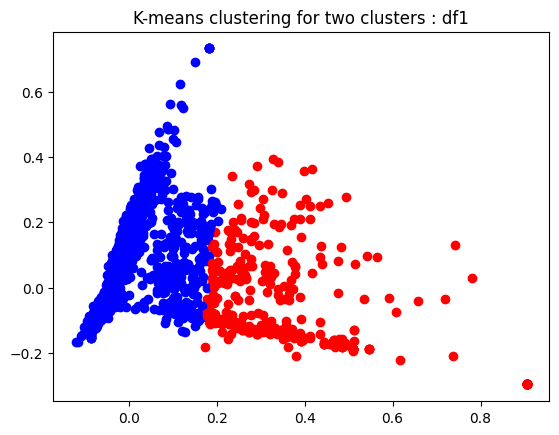

In [213]:
reduced_X = pca.fit_transform(X1)
colors = ['red', 'blue']
for i, point in enumerate(reduced_X):
    plt.scatter(point[0], point[1], color=colors[kmeans.labels_[i]])
plt.title("K-means clustering for two clusters : df1")
plt.show()


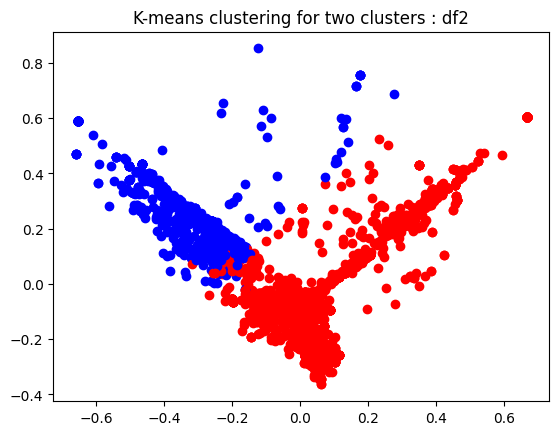

In [221]:
reduced_X2 = pca.fit_transform(X2)
colors = ['red', 'blue']
for i, point in enumerate(reduced_X2):
    plt.scatter(point[0], point[1], color=colors[kmeans.labels_[i]])
plt.title("K-means clustering for two clusters : df2")
plt.show()


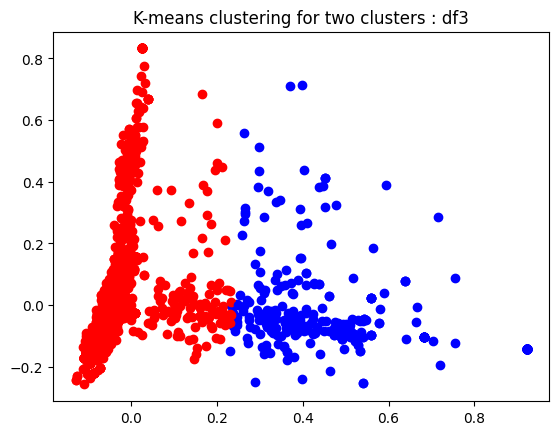

In [231]:
reduced_X3 = pca.fit_transform(X3)
colors = ['red', 'blue']
for i, point in enumerate(reduced_X3):
    plt.scatter(point[0], point[1], color=colors[kmeans.labels_[i]])
plt.title("K-means clustering for two clusters : df3")
plt.show()

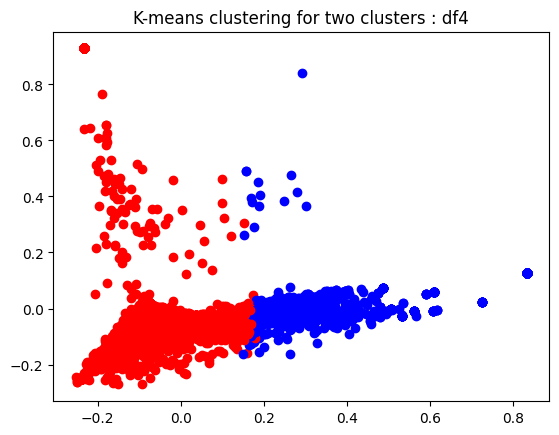

In [191]:
reduced_X4 = pca.fit_transform(X4)
colors = ['red', 'blue']
for i, point in enumerate(reduced_X4):
    plt.scatter(point[0], point[1], color=colors[kmeans.labels_[i]])

plt.title("K-means clustering for two clusters : df4")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

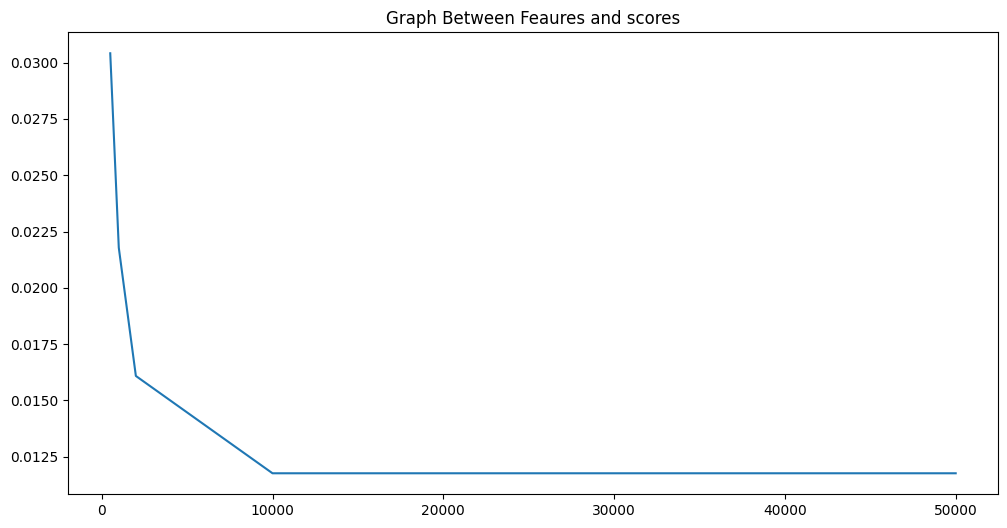

In [233]:
no_of_features = [500,1000,2000,10000,50000]
scores = []
for i in no_of_features:
  vectorizer = TfidfVectorizer(max_features = i, max_df=0.95, min_df=2, stop_words='english')
  X1 = vectorizer.fit_transform(df1['clean_comment_text'])
  X1 = X1.toarray()
  kmeans = KMeans(n_clusters=2, random_state=42)
  kmeans.fit(X1)
  labels1 = kmeans.predict(X1)
  scores.append(Silhouette(X1,labels1))
plt.figure(figsize = (12,6))
plt.plot(no_of_features, scores)
plt.title("Graph Between Feaures and scores")
plt.show()






## **Hierarchial Clustering**

In [234]:
from sklearn.cluster import AgglomerativeClustering

In [235]:
scores1 = []

In [237]:
# Run agglomerative clustering

clusterer = AgglomerativeClustering(n_clusters=2)
hier_model1 = clusterer.fit(reduced_X)
hier_cluster_pred1 = hier_model1.labels_
scores1.append(Silhouette(reduced_X, hier_cluster_pred1))
print('Silhouette score:',Silhouette(reduced_X, hier_cluster_pred1))

Silhouette score: 0.7325730926256188


In [239]:
hier_model2 = clusterer.fit(reduced_X2)
hier_cluster_pred2 = hier_model2.labels_
print('Silhouette score:',Silhouette(reduced_X2, hier_cluster_pred2))
scores1.append(Silhouette(reduced_X2, hier_cluster_pred2))

Silhouette score: 0.6962510846148728


In [241]:
hier_model3 = clusterer.fit(reduced_X3)
hier_cluster_pred3 = hier_model3.labels_
print('Silhouette score:',Silhouette(reduced_X3, hier_cluster_pred3))
scores1.append(Silhouette(reduced_X3, hier_cluster_pred3))

Silhouette score: 0.7503638407701674


In [243]:
hier_model4 = clusterer.fit(reduced_X4)
hier_cluster_pred4 = hier_model4.labels_
print('Silhouette score:',Silhouette(reduced_X4, hier_cluster_pred4))
scores1.append(Silhouette(reduced_X4, hier_cluster_pred4))

Silhouette score: 0.6489469200527915


In [207]:
avg_silhouette_score = np.mean(scores1)
print("Average silhouette score for hierarchical clustering:",avg_silhouette_score)

Average silhouette score for hierarchical clustering: 0.6700253397472398


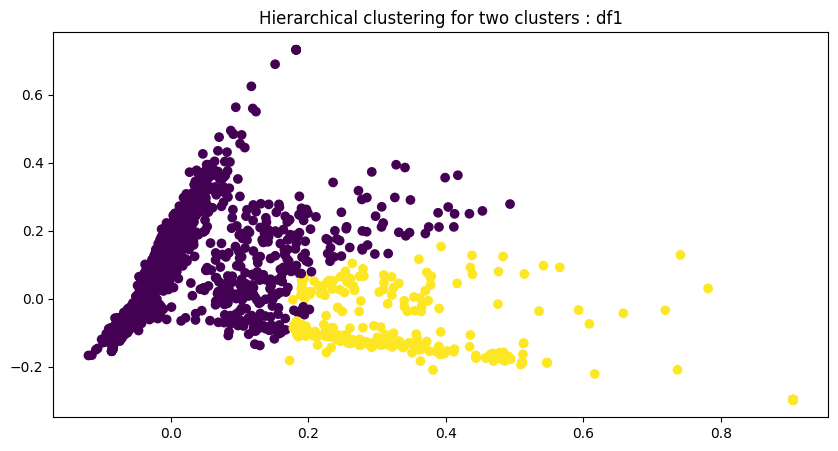

In [238]:
plt.figure(figsize=(10, 5))
plt.scatter(reduced_X[:,0], reduced_X[:,1], c=hier_model1.labels_)
plt.title("Hierarchical clustering for two clusters : df1")
plt.show()

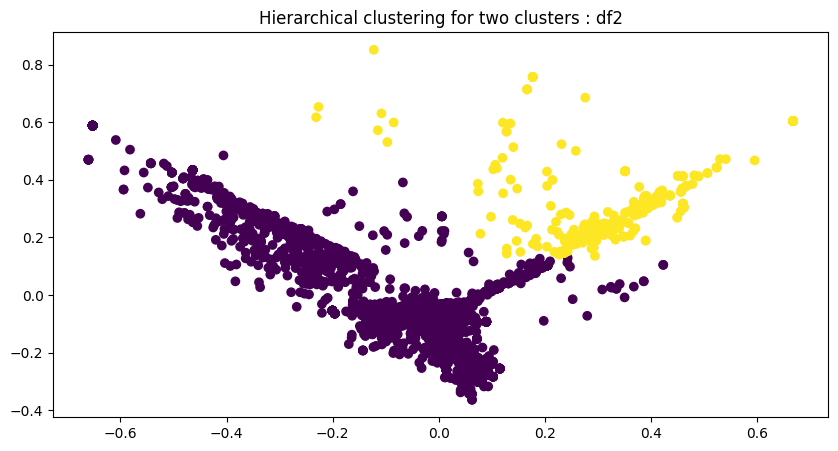

In [240]:
plt.figure(figsize=(10, 5))
plt.scatter(reduced_X2[:,0], reduced_X2[:,1], c=hier_model2.labels_)
plt.title("Hierarchical clustering for two clusters : df2")
plt.show()

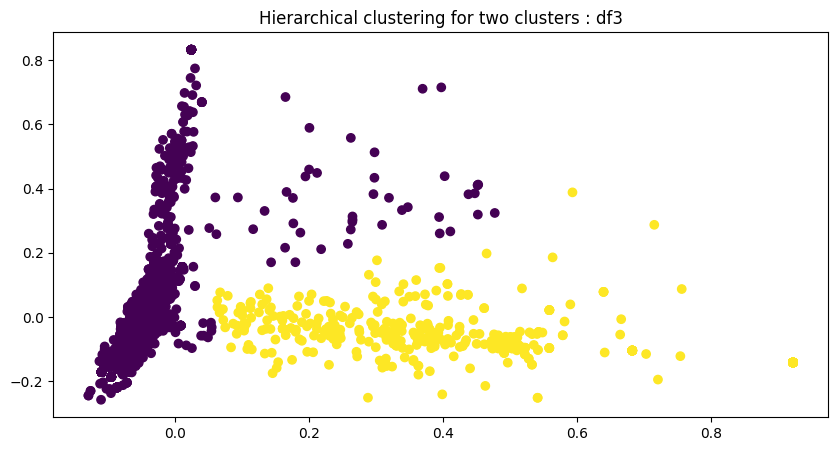

In [242]:
plt.figure(figsize=(10, 5))
plt.scatter(reduced_X3[:,0], reduced_X3[:,1], c=hier_model3.labels_)
plt.title("Hierarchical clustering for two clusters : df3")
plt.show()

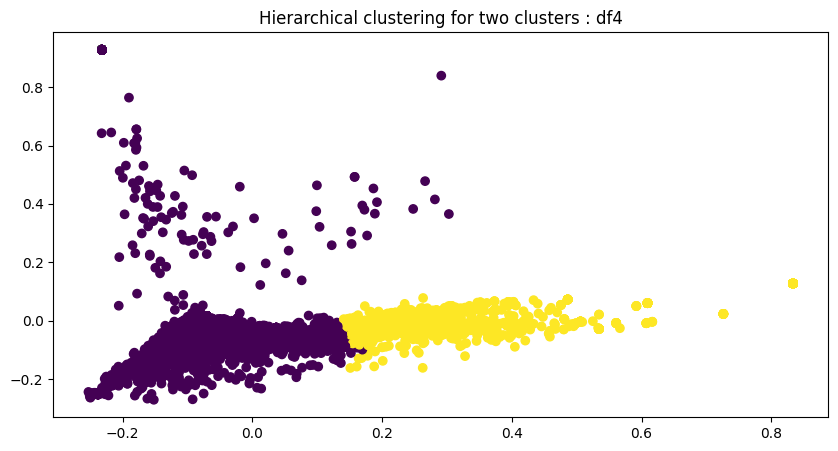

In [244]:
plt.figure(figsize=(10, 5))
plt.scatter(reduced_X4[:,0], reduced_X4[:,1], c=hier_model4.labels_)
plt.title("Hierarchical clustering for two clusters : df4")
plt.show()

# **Comparing the above trained models**

As we can see from the average Silhouette scores of the above trained models, we can conclude that ***Hierarchical Clustering*** model gives the best clusters with an average Silhouette score of about 0.75 and hence, it is the best model for the required task.

In all above trained models, the clusters with less number of datapoints are the spam comments as the number of spam comments are usually way lesser than the non-spam comments. Hence, in the K-Means clustering the dots in red represent spam comments. Similarly in Hierarchical clustering, the yellow dots represent the spam comments.